In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('medical_examination.csv')

In [5]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [6]:
df.plot

In [7]:
import matplotlib.pyplot as plt

In [8]:
df.hist

<bound method hist_frame of           id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0         

In [9]:
df['cholesterol', 'gluc', 'alco', 'active','smoke'].plot(kind='hist', bins=10, edgecolor='black')

# Step 3: Add labels and title
plt.xlabel('variable')
plt.ylabel('total')
plt.title('cardio=0')

# Step 4: Show the plot
plt.show()

KeyError: ('cholesterol', 'gluc', 'alco', 'active', 'smoke')

In [13]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
import seaborn as sns

### Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

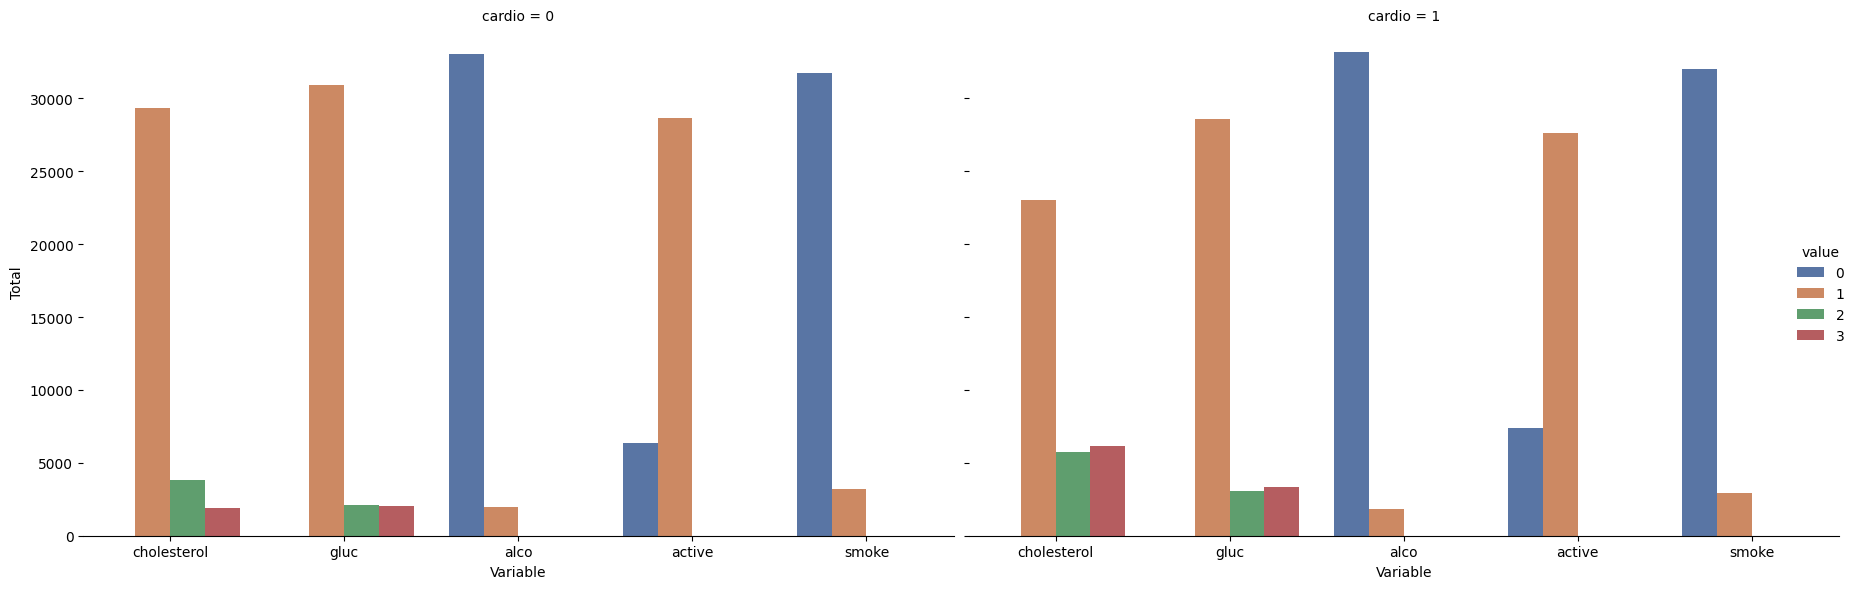

In [15]:
df_melted = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke'])

# Step 3: Create the plot
g = sns.catplot(x='variable', hue='value', col='cardio', data=df_melted, kind='count', height=6, aspect=1.5, palette='deep')
g.set_axis_labels('Variable', 'Total')
g.set_titles('cardio = {col_name}')
g.despine(left=True)

# Step 4: Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [22]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [23]:
df['bmi']=df['weight']/(df['height']/100)

In [25]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,36.904762
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,54.487179


In [26]:
df['overweight']= df['bmi'].apply(lambda x:1 if x>25 else 0)

In [49]:
df.drop(['bmi'],axis=1,inplace=True)

In [51]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1


### Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [43]:
df['cholesterol']=df['cholesterol'].apply(lambda x:0 if x==1 else 1)

In [46]:
columns_to_change = ['cholesterol', 'gluc']

# Apply the function to the selected columns
df[columns_to_change] = df[columns_to_change].applymap(lambda x: 0 if x == 1 else 1)

In [52]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,1


In [47]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,36.904762,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,54.487179,1


In [44]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,36.904762,1
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,54.487179,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,38.787879,1
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,48.520710,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,35.897436,1


### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

  cardio     variable  value
0      0  cholesterol      1
1      1  cholesterol      0
2      1  cholesterol      0
3      1  cholesterol      1
4      0  cholesterol      1


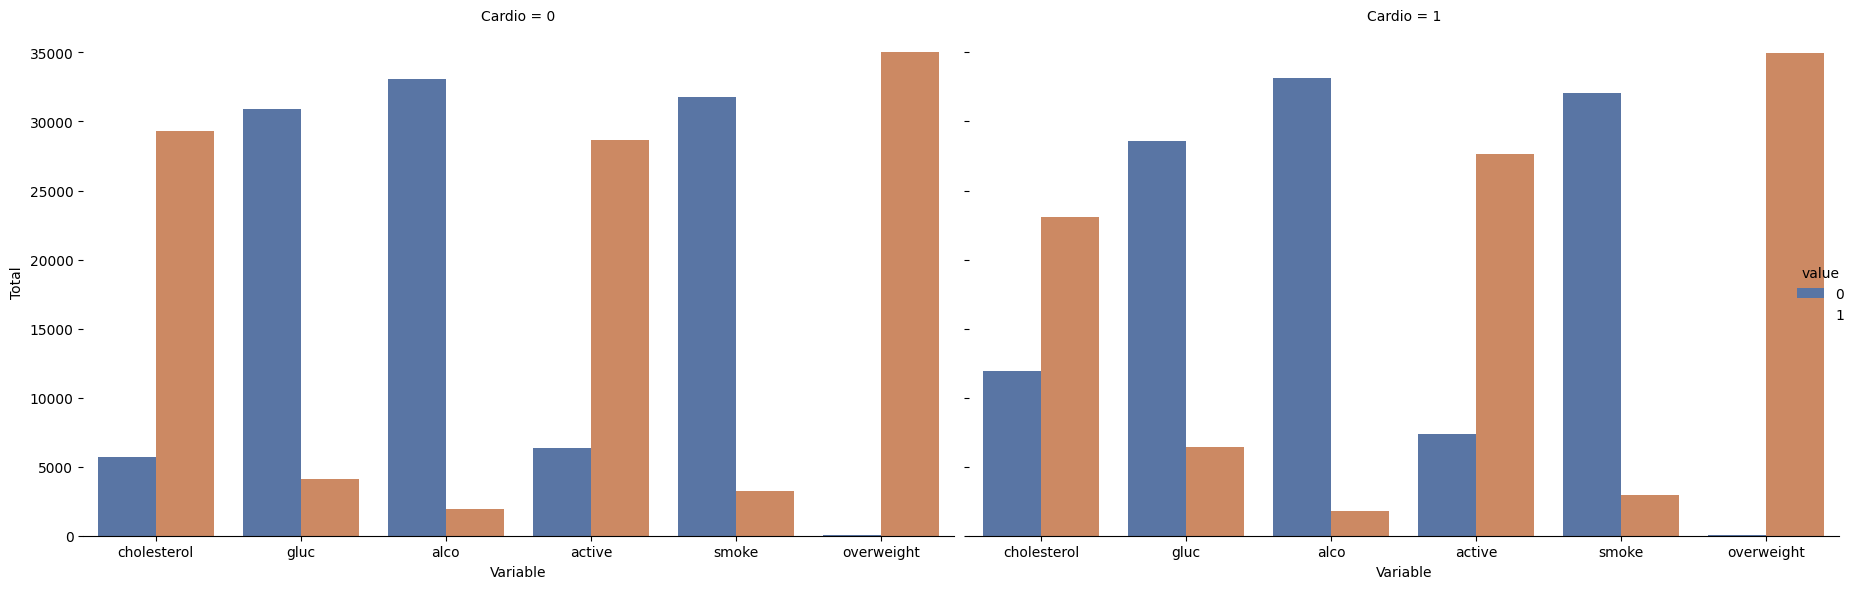

In [53]:
df['cardio'] = df['cardio'].astype('category')

# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'overweight'])

# Show a sample of the melted DataFrame
print(df_melted.head())

# Create the catplot
g = sns.catplot(
    x='variable',       # Categorical feature on x-axis
    hue='value',        # Differentiate by value (e.g., 0 or 1)
    col='cardio',       # Separate charts for each 'cardio' value
    data=df_melted,     # Data source
    kind='count',       # Create a count plot
    height=6,           # Height of each facet
    aspect=1.5,         # Aspect ratio of each facet
    palette='deep'      # Color palette
)

# Set axis labels and titles
g.set_axis_labels('Variable', 'Total')
g.set_titles('Cardio = {col_name}')
g.despine(left=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()





### Clean the data. Filter out the following patient segments that represent incorrect data: 

### diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [58]:
df=df[df['ap_lo']<=df['ap_hi']]

In [59]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,1


### height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

In [65]:
df[df['height']<=df['height'].quantile(0.025)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
65,87,21752,1,148,80.0,130,90,1,0,0,0,1,1,1
165,223,21135,1,148,53.0,120,80,1,0,0,0,1,1,1
183,250,23312,1,148,50.0,120,80,0,0,0,0,1,0,1
224,309,21800,2,76,55.0,120,80,1,0,0,0,1,0,1
234,324,21377,1,149,60.0,120,80,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69874,99801,18812,1,150,67.0,120,80,1,0,0,0,1,0,1
69896,99837,23452,1,150,69.0,120,80,1,0,0,0,1,1,1
69934,99901,15843,1,143,70.0,120,90,0,0,0,0,1,1,1
69938,99909,22608,1,149,61.0,130,90,0,1,0,0,1,0,1


In [64]:
df['height'].quantile(0.025)

150.0

### height is more than the 97.5th percentile

In [63]:
df[df['height']>=df['height'].quantile(0.975)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
14,23,14532,2,181,95.0,130,90,1,0,1,1,1,0,1
62,81,20330,2,187,115.0,130,90,1,0,0,1,1,0,1
74,103,16039,2,180,90.0,140,90,0,1,0,0,0,0,1
76,105,20397,2,188,105.0,120,80,1,0,0,0,1,1,1
94,127,15946,2,185,88.0,133,89,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69913,99862,18748,2,186,101.0,110,80,0,0,0,0,1,0,1
69975,99963,21264,2,182,100.0,120,80,1,0,0,0,1,1,1
69981,99972,17500,2,182,110.0,130,90,0,1,0,0,1,1,1
69986,99978,18198,2,180,78.0,120,80,1,0,0,0,1,0,1


### weight is less than the 2.5th percentile

In [68]:
df['weight'].quantile(0.0275)

52.0

In [67]:
df[df['weight']<=df['weight'].quantile(0.0275)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
17,27,16747,1,158,52.0,110,70,1,1,0,0,1,0,1
23,33,23376,2,156,45.0,110,60,1,0,0,0,1,0,1
44,59,19764,1,154,50.0,170,80,0,0,0,0,1,1,1
80,109,16591,1,159,49.0,120,70,1,0,0,0,1,0,1
107,142,14499,2,164,48.0,110,70,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69908,99856,14823,1,152,42.0,120,80,1,0,0,0,1,0,1
69912,99861,16002,1,155,48.0,90,70,1,0,0,0,1,0,1
69919,99871,17312,1,159,45.0,110,70,0,1,0,0,1,0,1
69961,99948,16598,1,161,50.0,110,75,1,0,0,0,1,0,1


### weight is more than the 97.5th percentile

In [70]:
df['weight'].quantile(0.975)

107.0

In [69]:
df[df['weight']>=df['weight'].quantile(0.975)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
15,24,16782,2,172,112.0,120,80,1,0,0,0,0,1,1
46,61,18207,1,162,107.0,150,90,0,0,0,0,1,1,1
62,81,20330,2,187,115.0,130,90,1,0,0,1,1,0,1
83,114,19570,1,152,110.0,160,90,1,0,0,0,1,1,1
196,267,22675,1,176,108.0,140,90,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,99799,19736,2,188,108.0,130,80,0,1,0,1,0,1,1
69946,99925,21333,1,164,115.0,130,80,1,0,0,0,1,1,1
69947,99930,23305,2,172,113.0,110,80,1,0,0,0,0,1,1
69981,99972,17500,2,182,110.0,130,90,0,1,0,0,1,1,1


### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

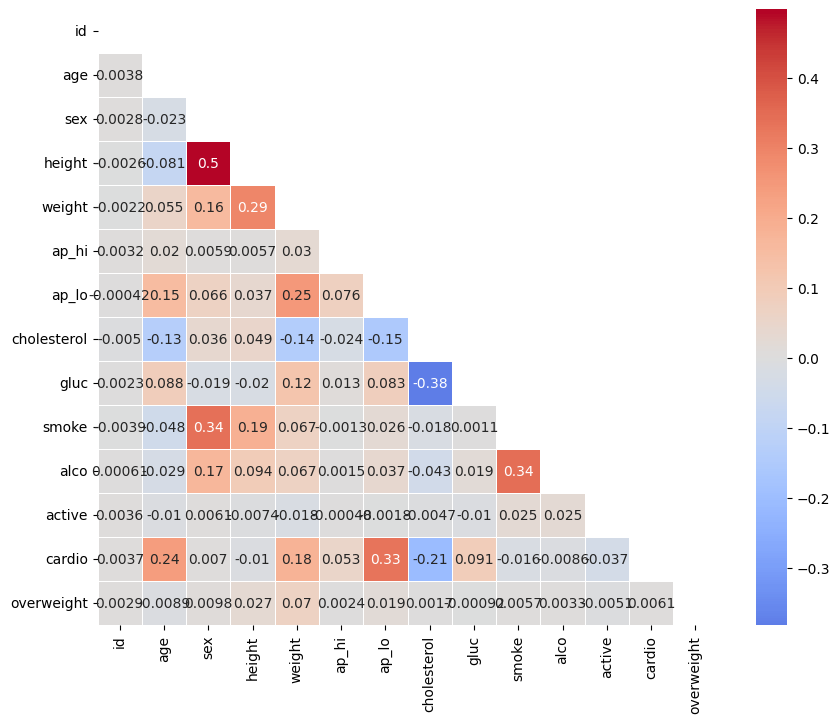

In [71]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='white')

# Display the heatmap
plt.show()